In [ ]:
url = "https://www.kaggle.com/datasets/mahmoudlimam/preprocessed-chronic-kidney-disease-dataset" #@param {type:"string"}


In [ ]:
# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
# Importing the keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns

In [ ]:
# Importing the dataset
dataset = pd.read_csv('CKD_Preprocessed.csv')
X = dataset.iloc[:, 0:24].values
y = dataset.iloc[: , 24].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
ct = ColumnTransformer([("Chronic Kidney Disease: yes", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Initialising the ANN
classifier = Sequential()


In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_shape = (None,None,32)))
classifier.add(Dropout(0.1)) # should be below 0.6

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.1)) # should be below 0.6

In [ ]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the training set
history=classifier.fit(x = X_train, y = y_train, batch_size = 24, epochs = 240)

Epoch 1/240
14/14 [==============================] - 4s 5ms/step - loss: 0.6925 - accuracy: 0.5969
Epoch 2/240
14/14 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6187
Epoch 3/240
14/14 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.6187
Epoch 4/240
14/14 [==============================] - 0s 5ms/step - loss: 0.6741 - accuracy: 0.6187
Epoch 5/240
14/14 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6187
Epoch 6/240
14/14 [==============================] - 0s 5ms/step - loss: 0.6222 - accuracy: 0.6187
Epoch 7/240
14/14 [==============================] - 0s 4ms/step - loss: 0.5760 - accuracy: 0.6187
Epoch 8/240
14/14 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.6187
Epoch 9/240
14/14 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.6187
Epoch 10/240
14/14 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.6187
Epoch 11/

In [ ]:
# Predicting the Test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ckd = confusion_matrix(y_test, y_pred)
print(ckd)

[[28  0]
 [ 1 51]]


In [ ]:
# Accuracy using confusion matrix
accuracy_per = ((ckd[0,0]+ckd[1,1])/len(y_test))
print("Accuracy: ",accuracy_per * 100)


Accuracy:  98.75


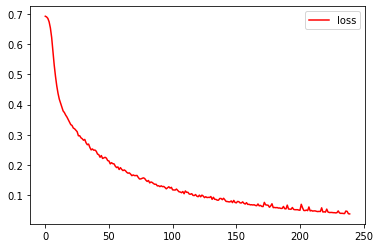

In [ ]:
# looking the loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'],"r", label='loss')     # loss of train
 
           
plt.legend()  # show label
plt.show()    # show picture

In [ ]:
import numpy as np

plt.figure(figsize=(10,8))          # 定義一個視窗(10,8 為視窗大小)
plt.subplots_adjust(hspace = 0.3)   # 調整兩張圖的間距

# 實際值-預測值(*max(label)表示恢復原始值)
error=y_test.reshape(30,1)*max(label)-model.predict(y_test)*max(label)
# 把誤差分成 15 等份, 求出每一等份的長度
step=(max(error)-min(error))/15
# 寫出每一等份的值    
interval=[i for i in range(int(min(error)),
                           int(max(error))+int(step),
                           int(step))]

# 實際預測比較圖
width = 0.3
plt.subplot(2,1,1)      # 第一張圖位於視窗裡的位置 (2列1行的第二個位置 - 上)
plt.xlabel("test data") # x軸名稱
plt.ylabel("money")                             # y軸名稱
plt.bar(np.linspace(1,30,30)-width/2,           # 實際值
        (test_label*max(label)).reshape(30),
        width=width, label='actual')                
plt.bar(np.linspace(1,30,30)+width/2,           # 預測值
        (model.predict(test_data)*max(label)).reshape(30),
        width=width, label='predict') 

plt.legend()

# 誤差分布圖
plt.subplot(2,1,2)      # 第二張圖位於視窗裡的位置 (2列1行的第二個位置 - 下)
plt.xlabel("error")     # x軸名稱
plt.ylabel("quantity")  # y軸名稱
plt.hist(error,interval,linewidth=1,edgecolor='black')   #顯示

plt.show()